In [1]:
%cd ../

/home/zulqarnain/algorithm16_skipped/htfatorch


In [2]:
import logging
import numpy as np
import htfa_torch.dtfa as DTFA
import htfa_torch.niidb as niidb
import htfa_torch.utils as utils
import matplotlib.pyplot as plt

/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/utils/deprecation.py

In [3]:
import itertools
from torch.nn.functional import softplus
import matplotlib.patches as mpatches
from ordered_set import OrderedSet

In [4]:
import torch

torch.cuda.set_device(0)

In [5]:
%matplotlib inline

In [6]:
scenario_name = 'scenario_1_simplified_tiny'
TRAIN = True

In [7]:
logging.basicConfig(format='%(asctime)s %(message)s', datefmt='%m/%d/%Y %H:%M:%S',
                    level=logging.INFO)

In [8]:
synthetic_db = niidb.FMriActivationsDb('data/simulated_simplified_data_1_tiny.db')

In [11]:
dtfa = DTFA.DeepTFA(synthetic_db.all(), mask='/home/zulqarnain/fmri_data/simulated_degeneracy_data/wholebrain.nii.gz', num_factors=3, embedding_dim=2)

08/20/2020 19:20:44 Loading Nifti image /home/zulqarnain/fmri_data/simulated_simplified_data_C/Scenario_1_tiny/nifti_files/participant_1_video1_low_0.nii with mask /home/zulqarnain/fmri_data/simulated_simplified_data_C/wholebrain.nii.gz (zscore=False, smooth=None, zscore_by_rest=False)
08/20/2020 19:20:44 Loading Nifti image /home/zulqarnain/fmri_data/simulated_simplified_data_C/Scenario_1_tiny/nifti_files/participant_1_video2_low_0.nii with mask /home/zulqarnain/fmri_data/simulated_simplified_data_C/wholebrain.nii.gz (zscore=False, smooth=None, zscore_by_rest=False)
08/20/2020 19:20:44 Loading Nifti image /home/zulqarnain/fmri_data/simulated_simplified_data_C/Scenario_1_tiny/nifti_files/participant_1_video3_high_0.nii with mask /home/zulqarnain/fmri_data/simulated_simplified_data_C/wholebrain.nii.gz (zscore=False, smooth=None, zscore_by_rest=False)
08/20/2020 19:20:44 Loading Nifti image /home/zulqarnain/fmri_data/simulated_simplified_data_C/Scenario_1_tiny/nifti_files/participant_1_v

In [12]:
dtfa.num_blocks

16

In [13]:
dtfa.tasks()

OrderedSet(['video1', 'video2', 'video3', 'video4', 'video5', 'video6', 'video7', 'video8'])

In [14]:
dtfa.subjects()

OrderedSet([1, 2])

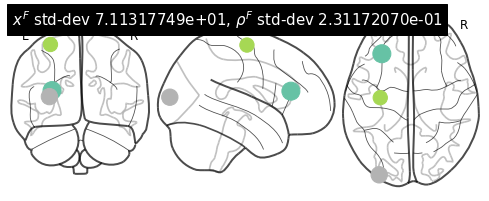

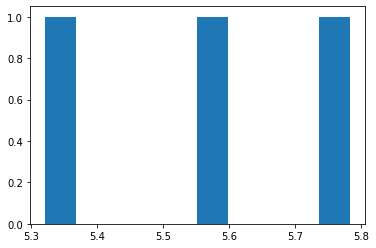

(<nilearn.plotting.displays.OrthoProjector at 0x7fb5c1e1a690>,
 tensor([[-29.6081,  32.4897,  15.7444],
         [-31.2850, -13.7419,  64.2411],
         [-32.3779, -94.8873,   9.3989]]),
 tensor([5.7823, 5.3221, 5.5906]))

In [15]:
dtfa.visualize_factor_embedding()

In [16]:
if TRAIN:
    losses = dtfa.train(num_steps=1000, learning_rate={'q': 1e-1, 'p': 1e-3}, log_level=logging.INFO, num_particles=1,
                        batch_size=60, use_cuda=True, checkpoint_steps=500, blocks_batch_size=60, patience=50)

08/20/2020 19:20:48 [Epoch 1] (285ms) Posterior free-energy 1.75100675e+06 = KL from prior 2.37050708e+03 - log-likelihood -1.74863625e+06
08/20/2020 19:20:48 Saving checkpoint...
08/20/2020 19:20:48 [Epoch 2] (171ms) Posterior free-energy 1.52749338e+06 = KL from prior 2.36263159e+03 - log-likelihood -1.52513075e+06
08/20/2020 19:20:48 [Epoch 3] (165ms) Posterior free-energy 1.22963325e+06 = KL from prior 2.39562280e+03 - log-likelihood -1.22723762e+06
08/20/2020 19:20:48 [Epoch 4] (157ms) Posterior free-energy 9.04619125e+05 = KL from prior 2.42415161e+03 - log-likelihood -9.02195000e+05
08/20/2020 19:20:48 [Epoch 5] (156ms) Posterior free-energy 8.05374125e+05 = KL from prior 2.44122852e+03 - log-likelihood -8.02932875e+05
08/20/2020 19:20:49 [Epoch 6] (157ms) Posterior free-energy 4.99147750e+05 = KL from prior 2.55531323e+03 - log-likelihood -4.96592438e+05
08/20/2020 19:20:49 [Epoch 7] (157ms) Posterior free-energy 2.95183250e+05 = KL from prior 2.59438403e+03 - log-likelihood -2

08/20/2020 19:20:57 [Epoch 60] (157ms) Posterior free-energy -1.41238200e+06 = KL from prior 4.53207178e+03 - log-likelihood 1.41691412e+06
08/20/2020 19:20:57 [Epoch 61] (157ms) Posterior free-energy -1.41504125e+06 = KL from prior 4.54188525e+03 - log-likelihood 1.41958312e+06
08/20/2020 19:20:57 [Epoch 62] (157ms) Posterior free-energy -1.41305850e+06 = KL from prior 4.48024268e+03 - log-likelihood 1.41753875e+06
08/20/2020 19:20:58 [Epoch 63] (157ms) Posterior free-energy -1.41493862e+06 = KL from prior 4.50943555e+03 - log-likelihood 1.41944800e+06
08/20/2020 19:20:58 [Epoch 64] (157ms) Posterior free-energy -1.41486225e+06 = KL from prior 4.50513184e+03 - log-likelihood 1.41936738e+06
08/20/2020 19:20:58 [Epoch 65] (157ms) Posterior free-energy -1.42054738e+06 = KL from prior 4.56343408e+03 - log-likelihood 1.42511075e+06
08/20/2020 19:20:58 [Epoch 66] (157ms) Posterior free-energy -1.41818275e+06 = KL from prior 4.52189502e+03 - log-likelihood 1.42270462e+06
08/20/2020 19:20:58 

08/20/2020 19:21:06 [Epoch 119] (158ms) Posterior free-energy -1.43581912e+06 = KL from prior 3.59652441e+03 - log-likelihood 1.43941562e+06
08/20/2020 19:21:07 [Epoch 120] (158ms) Posterior free-energy -1.43687925e+06 = KL from prior 3.65219482e+03 - log-likelihood 1.44053150e+06
08/20/2020 19:21:07 [Epoch 121] (158ms) Posterior free-energy -1.43532750e+06 = KL from prior 3.51369775e+03 - log-likelihood 1.43884125e+06
08/20/2020 19:21:07 [Epoch 122] (158ms) Posterior free-energy -1.43627388e+06 = KL from prior 3.56257397e+03 - log-likelihood 1.43983650e+06
08/20/2020 19:21:07 [Epoch 123] (158ms) Posterior free-energy -1.43637338e+06 = KL from prior 3.48087720e+03 - log-likelihood 1.43985425e+06
08/20/2020 19:21:07 [Epoch 124] (159ms) Posterior free-energy -1.43676450e+06 = KL from prior 3.45268652e+03 - log-likelihood 1.44021712e+06
08/20/2020 19:21:07 [Epoch 125] (159ms) Posterior free-energy -1.43510788e+06 = KL from prior 3.52124170e+03 - log-likelihood 1.43862912e+06
08/20/2020 19

08/20/2020 19:21:16 [Epoch 178] (159ms) Posterior free-energy -1.44093462e+06 = KL from prior 3.12924805e+03 - log-likelihood 1.44406388e+06
08/20/2020 19:21:16 [Epoch 179] (159ms) Posterior free-energy -1.44005975e+06 = KL from prior 3.20033130e+03 - log-likelihood 1.44326012e+06
08/20/2020 19:21:16 [Epoch 180] (159ms) Posterior free-energy -1.44104175e+06 = KL from prior 3.15868213e+03 - log-likelihood 1.44420038e+06
08/20/2020 19:21:16 [Epoch 181] (159ms) Posterior free-energy -1.44130350e+06 = KL from prior 3.19044116e+03 - log-likelihood 1.44449400e+06
08/20/2020 19:21:16 [Epoch 182] (160ms) Posterior free-energy -1.44199225e+06 = KL from prior 3.15238037e+03 - log-likelihood 1.44514462e+06
08/20/2020 19:21:17 [Epoch 183] (158ms) Posterior free-energy -1.44171662e+06 = KL from prior 3.16963306e+03 - log-likelihood 1.44488625e+06
08/20/2020 19:21:17 [Epoch 184] (159ms) Posterior free-energy -1.44102438e+06 = KL from prior 3.18741113e+03 - log-likelihood 1.44421175e+06
08/20/2020 19

08/20/2020 19:21:26 [Epoch 237] (165ms) Posterior free-energy -1.44408488e+06 = KL from prior 2.91506055e+03 - log-likelihood 1.44699988e+06
08/20/2020 19:21:26 [Epoch 238] (164ms) Posterior free-energy -1.44410600e+06 = KL from prior 2.85467896e+03 - log-likelihood 1.44696062e+06
08/20/2020 19:21:26 [Epoch 239] (165ms) Posterior free-energy -1.44439938e+06 = KL from prior 2.81395752e+03 - log-likelihood 1.44721338e+06
08/20/2020 19:21:26 [Epoch 240] (165ms) Posterior free-energy -1.44491650e+06 = KL from prior 2.90408423e+03 - log-likelihood 1.44782062e+06
08/20/2020 19:21:26 [Epoch 241] (165ms) Posterior free-energy -1.44489712e+06 = KL from prior 2.83371216e+03 - log-likelihood 1.44773088e+06
08/20/2020 19:21:26 [Epoch 242] (165ms) Posterior free-energy -1.44436975e+06 = KL from prior 2.88498047e+03 - log-likelihood 1.44725475e+06
08/20/2020 19:21:27 [Epoch 243] (165ms) Posterior free-energy -1.44439950e+06 = KL from prior 2.76286719e+03 - log-likelihood 1.44716238e+06
08/20/2020 19

08/20/2020 19:21:35 [Epoch 296] (160ms) Posterior free-energy -1.44698625e+06 = KL from prior 2.40290308e+03 - log-likelihood 1.44938912e+06
08/20/2020 19:21:35 [Epoch 297] (160ms) Posterior free-energy -1.44681688e+06 = KL from prior 2.36519141e+03 - log-likelihood 1.44918212e+06
08/20/2020 19:21:36 [Epoch 298] (162ms) Posterior free-energy -1.44659388e+06 = KL from prior 2.34661450e+03 - log-likelihood 1.44894050e+06
08/20/2020 19:21:36 [Epoch 299] (162ms) Posterior free-energy -1.44660962e+06 = KL from prior 2.34590967e+03 - log-likelihood 1.44895550e+06
08/20/2020 19:21:36 [Epoch 300] (162ms) Posterior free-energy -1.44610012e+06 = KL from prior 2.40450952e+03 - log-likelihood 1.44850462e+06
08/20/2020 19:21:36 [Epoch 301] (162ms) Posterior free-energy -1.44593800e+06 = KL from prior 2.33921826e+03 - log-likelihood 1.44827725e+06
08/20/2020 19:21:36 [Epoch 302] (162ms) Posterior free-energy -1.44631575e+06 = KL from prior 2.33321167e+03 - log-likelihood 1.44864900e+06
08/20/2020 19

08/20/2020 19:21:45 [Epoch 355] (161ms) Posterior free-energy -1.44791938e+06 = KL from prior 1.90608984e+03 - log-likelihood 1.44982550e+06
08/20/2020 19:21:45 [Epoch 356] (160ms) Posterior free-energy -1.44819162e+06 = KL from prior 1.92782117e+03 - log-likelihood 1.45011950e+06
08/20/2020 19:21:45 [Epoch 357] (160ms) Posterior free-energy -1.44842738e+06 = KL from prior 2.04606873e+03 - log-likelihood 1.45047350e+06
08/20/2020 19:21:45 [Epoch 358] (161ms) Posterior free-energy -1.44841950e+06 = KL from prior 1.95526611e+03 - log-likelihood 1.45037475e+06
08/20/2020 19:21:46 [Epoch 359] (161ms) Posterior free-energy -1.44816812e+06 = KL from prior 1.93117554e+03 - log-likelihood 1.45009925e+06
08/20/2020 19:21:46 [Epoch 360] (162ms) Posterior free-energy -1.44828838e+06 = KL from prior 1.95375977e+03 - log-likelihood 1.45024212e+06
08/20/2020 19:21:46 [Epoch 361] (162ms) Posterior free-energy -1.44798550e+06 = KL from prior 1.93219641e+03 - log-likelihood 1.44991775e+06
08/20/2020 19

08/20/2020 19:21:54 [Epoch 414] (162ms) Posterior free-energy -1.44922800e+06 = KL from prior 1.66857068e+03 - log-likelihood 1.45089662e+06
08/20/2020 19:21:55 [Epoch 415] (166ms) Posterior free-energy -1.44932175e+06 = KL from prior 1.69535693e+03 - log-likelihood 1.45101712e+06
08/20/2020 19:21:55 [Epoch 416] (166ms) Posterior free-energy -1.44904338e+06 = KL from prior 1.66851794e+03 - log-likelihood 1.45071188e+06
08/20/2020 19:21:55 [Epoch 417] (166ms) Posterior free-energy -1.44884038e+06 = KL from prior 1.62440796e+03 - log-likelihood 1.45046475e+06
08/20/2020 19:21:55 [Epoch 418] (166ms) Posterior free-energy -1.44938738e+06 = KL from prior 1.67304089e+03 - log-likelihood 1.45106038e+06
08/20/2020 19:21:55 [Epoch 419] (166ms) Posterior free-energy -1.44915188e+06 = KL from prior 1.68055652e+03 - log-likelihood 1.45083238e+06
08/20/2020 19:21:55 [Epoch 420] (167ms) Posterior free-energy -1.44951512e+06 = KL from prior 1.63987146e+03 - log-likelihood 1.45115500e+06
08/20/2020 19

08/20/2020 19:22:04 [Epoch 473] (166ms) Posterior free-energy -1.44986050e+06 = KL from prior 1.50344141e+03 - log-likelihood 1.45136400e+06
08/20/2020 19:22:04 [Epoch 474] (168ms) Posterior free-energy -1.44975650e+06 = KL from prior 1.51123291e+03 - log-likelihood 1.45126775e+06
08/20/2020 19:22:04 [Epoch 475] (166ms) Posterior free-energy -1.44983962e+06 = KL from prior 1.50893921e+03 - log-likelihood 1.45134862e+06
08/20/2020 19:22:05 [Epoch 476] (162ms) Posterior free-energy -1.44998062e+06 = KL from prior 1.45284998e+03 - log-likelihood 1.45143350e+06
08/20/2020 19:22:05 [Epoch 477] (160ms) Posterior free-energy -1.44962350e+06 = KL from prior 1.39403699e+03 - log-likelihood 1.45101750e+06
08/20/2020 19:22:05 [Epoch 478] (160ms) Posterior free-energy -1.44974212e+06 = KL from prior 1.42024841e+03 - log-likelihood 1.45116238e+06
08/20/2020 19:22:05 [Epoch 479] (160ms) Posterior free-energy -1.44981875e+06 = KL from prior 1.44199988e+03 - log-likelihood 1.45126075e+06
08/20/2020 19

08/20/2020 19:22:14 [Epoch 531] (163ms) Posterior free-energy -1.45032388e+06 = KL from prior 1.28260645e+03 - log-likelihood 1.45160650e+06
08/20/2020 19:22:14 [Epoch 532] (162ms) Posterior free-energy -1.45053075e+06 = KL from prior 1.33613025e+03 - log-likelihood 1.45186688e+06
08/20/2020 19:22:14 [Epoch 533] (162ms) Posterior free-energy -1.45056700e+06 = KL from prior 1.21463782e+03 - log-likelihood 1.45178162e+06
08/20/2020 19:22:14 [Epoch 534] (162ms) Posterior free-energy -1.45068112e+06 = KL from prior 1.25215356e+03 - log-likelihood 1.45193325e+06
08/20/2020 19:22:14 [Epoch 535] (162ms) Posterior free-energy -1.45030400e+06 = KL from prior 1.15471106e+03 - log-likelihood 1.45145875e+06
08/20/2020 19:22:14 [Epoch 536] (163ms) Posterior free-energy -1.45060188e+06 = KL from prior 1.21120947e+03 - log-likelihood 1.45181312e+06
08/20/2020 19:22:15 [Epoch 537] (162ms) Posterior free-energy -1.45054738e+06 = KL from prior 1.21447339e+03 - log-likelihood 1.45176188e+06
08/20/2020 19

08/20/2020 19:22:23 [Epoch 590] (161ms) Posterior free-energy -1.45073150e+06 = KL from prior 1.10727698e+03 - log-likelihood 1.45183875e+06
08/20/2020 19:22:24 [Epoch 591] (161ms) Posterior free-energy -1.45082800e+06 = KL from prior 1.17831396e+03 - log-likelihood 1.45200638e+06
08/20/2020 19:22:24 [Epoch 592] (163ms) Posterior free-energy -1.45101275e+06 = KL from prior 1.14394873e+03 - log-likelihood 1.45215675e+06
08/20/2020 19:22:24 [Epoch 593] (162ms) Posterior free-energy -1.45105750e+06 = KL from prior 1.11360583e+03 - log-likelihood 1.45217112e+06
08/20/2020 19:22:24 [Epoch 594] (162ms) Posterior free-energy -1.45116238e+06 = KL from prior 1.10749719e+03 - log-likelihood 1.45226988e+06
08/20/2020 19:22:24 [Epoch 595] (162ms) Posterior free-energy -1.45075300e+06 = KL from prior 1.12658423e+03 - log-likelihood 1.45187962e+06
08/20/2020 19:22:24 [Epoch 596] (163ms) Posterior free-energy -1.45116238e+06 = KL from prior 1.12884790e+03 - log-likelihood 1.45229125e+06
08/20/2020 19

08/20/2020 19:22:33 [Epoch 649] (166ms) Posterior free-energy -1.45140062e+06 = KL from prior 1.02302362e+03 - log-likelihood 1.45242362e+06
08/20/2020 19:22:33 [Epoch 650] (169ms) Posterior free-energy -1.45123662e+06 = KL from prior 9.79678101e+02 - log-likelihood 1.45221625e+06
08/20/2020 19:22:34 [Epoch 651] (167ms) Posterior free-energy -1.45133825e+06 = KL from prior 9.88186584e+02 - log-likelihood 1.45232638e+06
08/20/2020 19:22:34 [Epoch 652] (165ms) Posterior free-energy -1.45134788e+06 = KL from prior 1.00709296e+03 - log-likelihood 1.45235500e+06
08/20/2020 19:22:34 [Epoch 653] (165ms) Posterior free-energy -1.45133400e+06 = KL from prior 9.45770996e+02 - log-likelihood 1.45227975e+06
08/20/2020 19:22:34 [Epoch 654] (165ms) Posterior free-energy -1.45147175e+06 = KL from prior 1.05761304e+03 - log-likelihood 1.45252938e+06
08/20/2020 19:22:34 [Epoch 655] (165ms) Posterior free-energy -1.45155000e+06 = KL from prior 1.05078833e+03 - log-likelihood 1.45260075e+06
08/20/2020 19

08/20/2020 19:22:43 [Epoch 708] (165ms) Posterior free-energy -1.45151062e+06 = KL from prior 9.73821045e+02 - log-likelihood 1.45248450e+06
08/20/2020 19:22:43 [Epoch 709] (166ms) Posterior free-energy -1.45179988e+06 = KL from prior 9.72438965e+02 - log-likelihood 1.45277238e+06
08/20/2020 19:22:43 [Epoch 710] (165ms) Posterior free-energy -1.45151750e+06 = KL from prior 9.91884094e+02 - log-likelihood 1.45250938e+06
08/20/2020 19:22:44 [Epoch 711] (166ms) Posterior free-energy -1.45155600e+06 = KL from prior 1.00365393e+03 - log-likelihood 1.45255962e+06
08/20/2020 19:22:44 [Epoch 712] (166ms) Posterior free-energy -1.45165625e+06 = KL from prior 1.00513525e+03 - log-likelihood 1.45266138e+06
08/20/2020 19:22:44 [Epoch 713] (170ms) Posterior free-energy -1.45153150e+06 = KL from prior 9.75931458e+02 - log-likelihood 1.45250738e+06
08/20/2020 19:22:44 [Epoch 714] (173ms) Posterior free-energy -1.45162338e+06 = KL from prior 9.78156067e+02 - log-likelihood 1.45260150e+06
08/20/2020 19

08/20/2020 19:22:53 [Epoch 767] (171ms) Posterior free-energy -1.45172112e+06 = KL from prior 9.60259277e+02 - log-likelihood 1.45268138e+06
08/20/2020 19:22:53 [Epoch 768] (170ms) Posterior free-energy -1.45177088e+06 = KL from prior 9.76056580e+02 - log-likelihood 1.45274688e+06
08/20/2020 19:22:53 [Epoch 769] (171ms) Posterior free-energy -1.45188012e+06 = KL from prior 9.51804688e+02 - log-likelihood 1.45283188e+06
08/20/2020 19:22:54 [Epoch 770] (172ms) Posterior free-energy -1.45188500e+06 = KL from prior 9.41658020e+02 - log-likelihood 1.45282662e+06
08/20/2020 19:22:54 [Epoch 771] (172ms) Posterior free-energy -1.45196162e+06 = KL from prior 9.68233582e+02 - log-likelihood 1.45292988e+06
08/20/2020 19:22:54 [Epoch 772] (171ms) Posterior free-energy -1.45175725e+06 = KL from prior 9.75249084e+02 - log-likelihood 1.45273250e+06
08/20/2020 19:22:54 [Epoch 773] (171ms) Posterior free-energy -1.45185575e+06 = KL from prior 9.58223022e+02 - log-likelihood 1.45281400e+06
08/20/2020 19

08/20/2020 19:23:03 [Epoch 826] (171ms) Posterior free-energy -1.45191638e+06 = KL from prior 1.00534705e+03 - log-likelihood 1.45292175e+06
08/20/2020 19:23:03 [Epoch 827] (171ms) Posterior free-energy -1.45194500e+06 = KL from prior 9.11268982e+02 - log-likelihood 1.45285625e+06
08/20/2020 19:23:03 [Epoch 828] (171ms) Posterior free-energy -1.45196512e+06 = KL from prior 9.30268250e+02 - log-likelihood 1.45289538e+06
08/20/2020 19:23:04 [Epoch 829] (171ms) Posterior free-energy -1.45180275e+06 = KL from prior 9.11404724e+02 - log-likelihood 1.45271412e+06
08/20/2020 19:23:04 [Epoch 830] (171ms) Posterior free-energy -1.45206188e+06 = KL from prior 8.72044495e+02 - log-likelihood 1.45293388e+06
08/20/2020 19:23:04 [Epoch 831] (171ms) Posterior free-energy -1.45181000e+06 = KL from prior 9.55808777e+02 - log-likelihood 1.45276575e+06
08/20/2020 19:23:04 [Epoch 832] (171ms) Posterior free-energy -1.45189112e+06 = KL from prior 9.90971558e+02 - log-likelihood 1.45288212e+06
08/20/2020 19

08/20/2020 19:23:13 [Epoch 885] (165ms) Posterior free-energy -1.45210412e+06 = KL from prior 9.31368652e+02 - log-likelihood 1.45303550e+06
08/20/2020 19:23:13 [Epoch 886] (166ms) Posterior free-energy -1.45223525e+06 = KL from prior 8.66322266e+02 - log-likelihood 1.45310162e+06
08/20/2020 19:23:13 [Epoch 887] (166ms) Posterior free-energy -1.45214100e+06 = KL from prior 9.12043884e+02 - log-likelihood 1.45305300e+06
08/20/2020 19:23:14 [Epoch 888] (167ms) Posterior free-energy -1.45200625e+06 = KL from prior 9.73228882e+02 - log-likelihood 1.45297950e+06
08/20/2020 19:23:14 [Epoch 889] (167ms) Posterior free-energy -1.45203812e+06 = KL from prior 9.39757202e+02 - log-likelihood 1.45297788e+06
08/20/2020 19:23:14 [Epoch 890] (167ms) Posterior free-energy -1.45211112e+06 = KL from prior 9.54430786e+02 - log-likelihood 1.45306550e+06
08/20/2020 19:23:14 [Epoch 891] (167ms) Posterior free-energy -1.45199262e+06 = KL from prior 9.57391541e+02 - log-likelihood 1.45295000e+06
08/20/2020 19

08/20/2020 19:23:23 [Epoch 944] (176ms) Posterior free-energy -1.45218275e+06 = KL from prior 9.07392639e+02 - log-likelihood 1.45309012e+06
08/20/2020 19:23:23 [Epoch 945] (176ms) Posterior free-energy -1.45225238e+06 = KL from prior 8.76074829e+02 - log-likelihood 1.45312850e+06
08/20/2020 19:23:24 [Epoch 946] (173ms) Posterior free-energy -1.45237400e+06 = KL from prior 9.05805908e+02 - log-likelihood 1.45327975e+06
08/20/2020 19:23:24 [Epoch 947] (165ms) Posterior free-energy -1.45231288e+06 = KL from prior 8.84987854e+02 - log-likelihood 1.45319788e+06
08/20/2020 19:23:24 [Epoch 948] (165ms) Posterior free-energy -1.45226950e+06 = KL from prior 9.18845581e+02 - log-likelihood 1.45318838e+06
08/20/2020 19:23:24 [Epoch 949] (165ms) Posterior free-energy -1.45218925e+06 = KL from prior 8.98542358e+02 - log-likelihood 1.45308775e+06
08/20/2020 19:23:24 [Epoch 950] (165ms) Posterior free-energy -1.45238062e+06 = KL from prior 8.73497925e+02 - log-likelihood 1.45325412e+06
08/20/2020 19

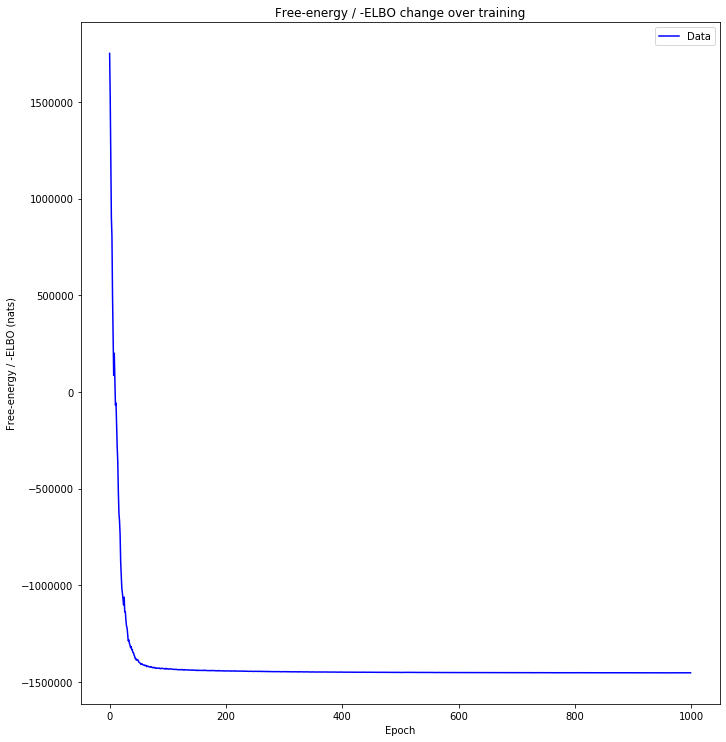

In [17]:
if TRAIN:
    utils.plot_losses(losses)

In [18]:
def task_labeler(task):
    return task


def rest_task_labeler(task):
    if task == 'rest':
        return 'Rest'
    else:
        return 'Task'

In [19]:
def subject_labeler(subject):
    return str(subject)

In [20]:
def stimulus_labeler(stimulus):
    stim = stimulus[-1]
    if int(stim) == 1 or int(stim) == 2:
        return 'State 0'
    elif int(stim) == 3 or int(stim) == 4:
        return 'State 1'
    elif int(stim) == 5 or int(stim) == 6:
        return 'State 2'
    elif int(stim) == 7 or int(stim) == 8:
        return 'State 3'
    else:
        print ('Error')

In [21]:
hyperparams = dtfa.variational.hyperparams.state_vardict()
tasks = dtfa.tasks()
subjects = dtfa.subjects()
interactions = OrderedSet(list(itertools.product(subjects, tasks)))

In [22]:
interactions

OrderedSet([(1, 'video1'), (1, 'video2'), (1, 'video3'), (1, 'video4'), (1, 'video5'), (1, 'video6'), (1, 'video7'), (1, 'video8'), (2, 'video1'), (2, 'video2'), (2, 'video3'), (2, 'video4'), (2, 'video5'), (2, 'video6'), (2, 'video7'), (2, 'video8')])

/home/zulqarnain/algorithm16_skipped/htfatorch/htfa_torch/utils.py:149: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


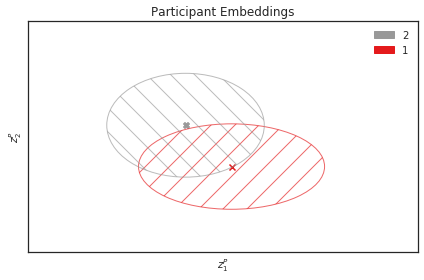

In [23]:
dtfa.scatter_subject_embedding(labeler=subject_labeler, figsize=None, colormap='Set1',
                            filename='subject_norest_subject_embedding' + scenario_name + '.png')

/home/zulqarnain/algorithm16_skipped/htfatorch/htfa_torch/utils.py:149: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


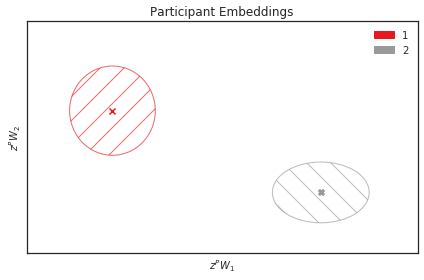

In [24]:
dtfa.scatter_subject_weight_embedding(labeler=subject_labeler, figsize=None, colormap='Set1',
                            filename='subject_norest_subject_weight_embedding' + scenario_name + '.png')

/home/zulqarnain/algorithm16_skipped/htfatorch/htfa_torch/utils.py:149: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


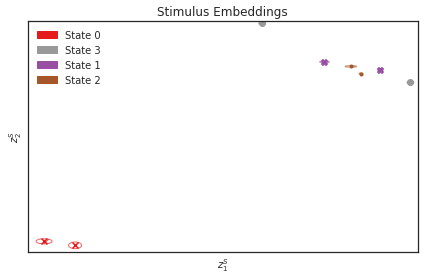

In [25]:
dtfa.scatter_task_embedding(labeler=stimulus_labeler,figsize=None, colormap='Set1',
                            filename='subject_norest_task_embedding' + scenario_name + '.png')

In [71]:
def scatter_interactions_embedding(self, labeler=None, filename='', show=True,
                                   xlims=None, ylims=None, figsize=utils.FIGSIZE,
                                   colormap='Accent', serialize_data=True,
                                   plot_ellipse=True, legend_ordering=None,nstd=3):

    def eigsorted(cov):
        vals, vecs = np.linalg.eigh(cov)
        order = vals.argsort()[::-1]
        return vals[order], vecs[:, order]
    
    if filename == '':
        filename = self.common_name() + '_task_embedding.pdf'
    hyperparams = self.variational.hyperparams.state_vardict()
    tasks = self.tasks()
    subjects = self.subjects()
    z_p_mu = hyperparams['subject_weight']['mu'].data
    z_s_mu = hyperparams['task']['mu'].data
    interactions = OrderedSet(list(itertools.product(subjects, tasks)))
    z_ps_mu = np.zeros(shape=(len(interactions),2))
    count = 0
    for p in range (len(subjects)):
        for t in range(len(tasks)):
            joint_embed = torch.cat((z_p_mu[p], z_s_mu[t]), dim=-1)
            interaction_embed = self.decoder.interaction_embedding(
                joint_embed).data
            z_ps_mu[count,:] = self.decoder.interaction_embedding_out(torch.cat((interaction_embed,
                                                                                 joint_embed),dim=-1)).data.numpy()
            count += 1
    embedding_name = 'z^{PS}'

    fig, ax = plt.subplots(facecolor='white', figsize=figsize, frameon=True)
    if xlims is not None:
        ax.set_xlim(xlims)
    if ylims is not None:
        ax.set_ylim(ylims)
    ax.set_xticks([])
    ax.set_yticks([])
    task_colors = ['black','darkgreen','red','blue']
    task_low_embeddings = []
    task_high_embeddings = []

    for i in range(len(z_ps_mu)):
        if stimulus_labeler(interactions[i][1]) == 'State 0':
            edgecolor = task_colors[0]
            if str(interactions[i][0]) == '1':
                ax.scatter(z_ps_mu[i,0],z_ps_mu[i,1],facecolor='none', edgecolor=task_colors[0], marker='o', s=400, linewidth=4)
            else:
                ax.scatter(z_ps_mu[i,0],z_ps_mu[i,1],facecolor='none', edgecolor=task_colors[0], marker='^', s=400, linewidth=4)
            task_low_embeddings.append(z_ps_mu[i,:])
        elif stimulus_labeler(interactions[i][1]) == 'State 1':
            edgecolor = task_colors[1]
            if str(interactions[i][0]) == '1':
                ax.scatter(z_ps_mu[i,0],z_ps_mu[i,1],facecolor='none', edgecolor=task_colors[1],marker='o', s=400, linewidth=4)
            else:
                ax.scatter(z_ps_mu[i,0],z_ps_mu[i,1],facecolor='none', edgecolor=task_colors[1],marker='^', s=400, linewidth=4)
            task_high_embeddings.append(z_ps_mu[i,:]) 
        elif stimulus_labeler(interactions[i][1]) == 'State 2':
            edgecolor = task_colors[2]
            if str(interactions[i][0]) == '1':
                ax.scatter(z_ps_mu[i,0],z_ps_mu[i,1],facecolor='none', edgecolor=task_colors[2],marker='o', s=400, linewidth=4)
            else:
                ax.scatter(z_ps_mu[i,0],z_ps_mu[i,1],facecolor='none', edgecolor=task_colors[2],marker='^', s=400, linewidth=4)
            task_high_embeddings.append(z_ps_mu[i,:]) 
        elif stimulus_labeler(interactions[i][1]) == 'State 3':
            edgecolor = task_colors[3]
            if str(interactions[i][0]) == '1':
                ax.scatter(z_ps_mu[i,0],z_ps_mu[i,1],facecolor='none', edgecolor=task_colors[3],marker='o', s=400, linewidth=4)
            else:
                ax.scatter(z_ps_mu[i,0],z_ps_mu[i,1],facecolor='none', edgecolor=task_colors[3],marker='^', s=400, linewidth=4)
            task_high_embeddings.append(z_ps_mu[i,:]) 

    ordered_tasks = ['Baseline','Trial A', 'Trial B', 'Trial C']
    single_task_colors = ['darkgreen','red','blue']
    manual_legend = [mpatches.Patch(color=c,label=t) for (c,t) in zip(task_colors,ordered_tasks)]
    temp_dict = {key:[] for key in subjects}
    linestyle = ['solid','dashed']

    
    plt.legend(handles=manual_legend, prop={'size': 16})
    if filename is not None:
        fig.savefig(filename)
    if show:
        fig.show()
        
    return task_low_embeddings,task_high_embeddings


In [72]:
def interactions_labeler(subject,task):
    
    return task_labeler(task) + subject_labeler(subject)

/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/ipykernel_launcher.py:93: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


([array([0.0832611 , 0.15792832]),
  array([0.08227283, 0.23507443]),
  array([-0.0641844, -0.0086247]),
  array([-0.06758499,  0.06429252])],
 [array([-3.77394819, -2.97560143]),
  array([-3.6931653 , -2.76803875]),
  array([-3.71507549, -2.85750437]),
  array([-3.60985613, -2.82774854]),
  array([-3.64422607, -2.97550464]),
  array([-4.22281837, -2.88684607]),
  array([-3.73209953, -2.95557499]),
  array([-3.65381908, -2.76184011]),
  array([-3.67463064, -2.84017587]),
  array([-3.56796169, -2.80680037]),
  array([-3.6011734 , -2.96748686]),
  array([-4.18989277, -2.92751694])])

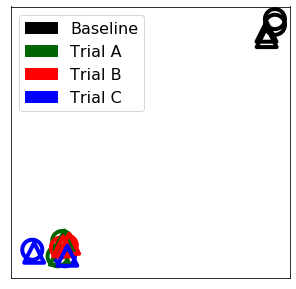

In [73]:
scatter_interactions_embedding(dtfa,labeler=interactions_labeler,
                               filename='subject_norest_interaction_embedding' + scenario_name + '.png',
                               plot_ellipse=True,colormap='tab20',figsize=(5,5),nstd=2)